In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *

In [3]:
#loading the dataset
path = untar_data(URLs.PETS)/'images'

In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:
!ln -s /root/.fastai/ /content/fai

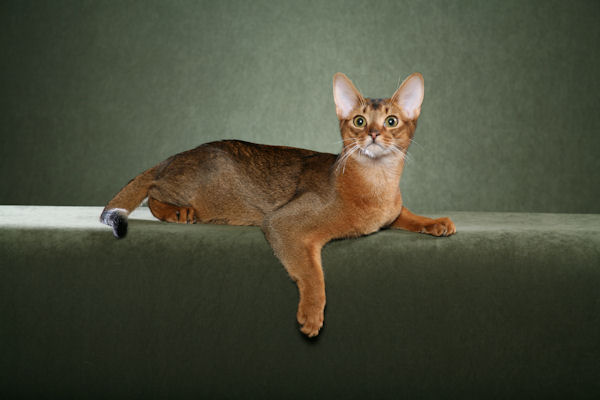

In [6]:
Image.open('/content/fai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [7]:
#the label - if the first character of the filename is upper - cat if not that is a dog
def is_cat(x): 
  return x.split('_')[0]

In [8]:
#preparing the dataset
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

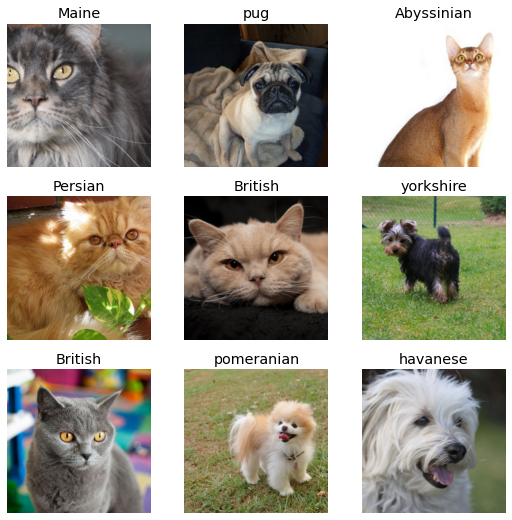

In [9]:
dls.show_batch(max_n=9, nrows=3)

In [16]:
#teaching the network
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.415156,0.320522,0.106901,01:42


epoch,train_loss,valid_loss,error_rate,time
0,0.421982,0.235832,0.083221,02:20
1,0.300054,0.324175,0.099459,02:20
2,0.230193,0.278661,0.092693,02:20
3,0.156707,0.259604,0.073072,02:20
4,0.085669,0.255512,0.069689,02:20
5,0.047183,0.227785,0.065629,02:20
6,0.031398,0.222579,0.060893,02:20
7,0.018558,0.227612,0.064953,02:20


In [17]:
dog_cat_type, _, probs = learn.predict('/content/ragdoll.jpg')
print(f"Is this a cat? {dog_cat_type}.")
print(f"Probability: {1-(probs[1].item()):.6f}")

Is this a cat? Birman.
Probability: 0.999965


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

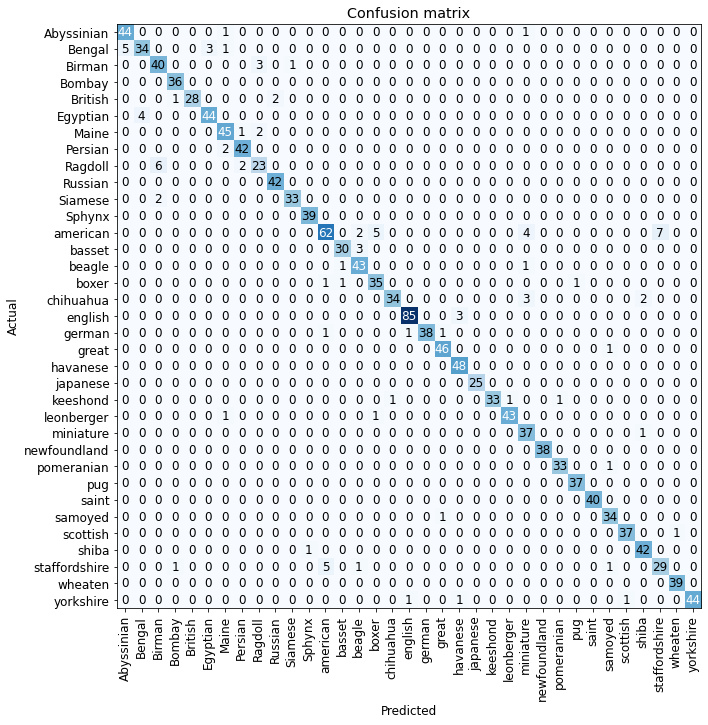

In [19]:
interp.plot_confusion_matrix(figsize=(10, 10))

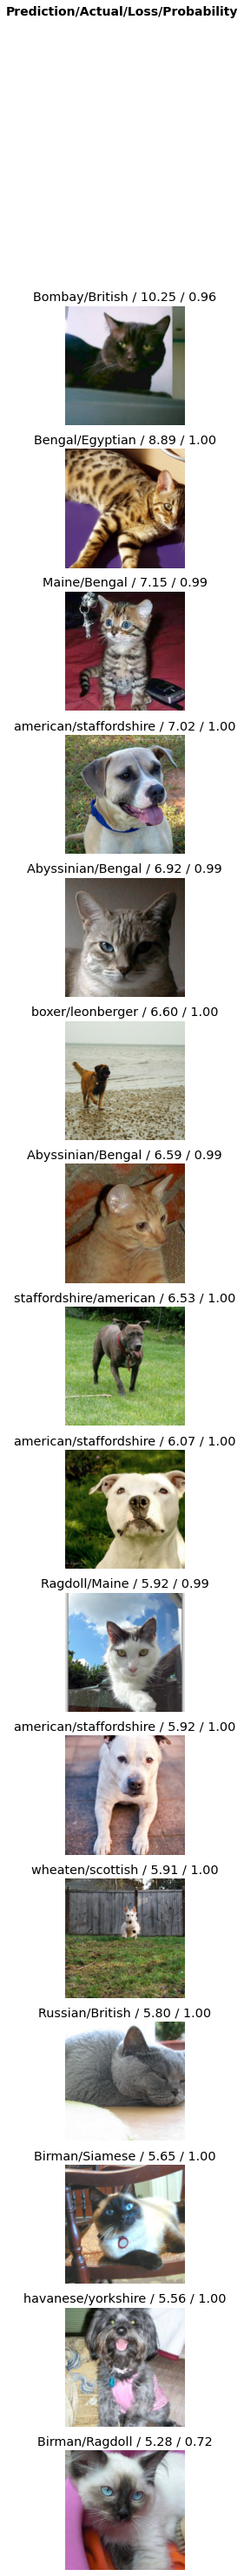

In [20]:
interp.plot_top_losses(16, nrows=16)

In [55]:
!pip install --upgrade git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-qr2u68eb
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-qr2u68eb
  Created wheel for fastai: filename=fastai-2.5.4-py3-none-any.whl size=187080 sha256=a3287ee35d0f4b169b2c190ac7a9a763ceb8227f7cc64d3c6ec7b7ae00802b90
  Stored in directory: /tmp/pip-ephem-wheel-cache-oe94kj6x/wheels/e2/81/30/9d0af3c5b8212ceb1118de039a8973c37f047102062f346d19
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3


In [26]:
learn.export('/content/network.pkl')

In [22]:
path.ls(file_exts='.pkl')

(#1) [Path('/root/.fastai/data/oxford-iiit-pet/images/export.pkl')]

In [27]:
load_network = load_learner('/content/network.pkl')

In [28]:
load_network.predict('/content/cattest1.jpg')

('Maine',
 TensorBase(6),
 TensorBase([1.0506e-03, 1.8951e-04, 2.6984e-07, 1.0906e-05, 6.9385e-03, 1.2261e-03, 9.8029e-01, 1.0140e-02, 8.4934e-07, 1.7105e-08, 1.1182e-07, 4.7814e-06, 3.0416e-07, 7.7075e-08, 4.6837e-07, 4.6370e-07,
         3.2003e-08, 1.4799e-07, 7.6253e-07, 9.6323e-06, 2.3460e-07, 4.3804e-07, 7.6951e-07, 5.6318e-07, 1.2958e-07, 2.9594e-06, 4.5761e-07, 5.5492e-07, 3.3411e-07, 7.3002e-08, 8.0613e-08, 3.9981e-06,
         3.5757e-08, 9.0580e-06, 1.1751e-04]))

In [33]:
result, _, tensorlist = load_network.predict('/content/cattest1.jpg')

In [36]:
tensorlist.max().item()

0.9802889227867126

In [37]:
load_network.dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British', 'Egyptian', 'Maine', 'Persian', 'Ragdoll', 'Russian', 'Siamese', 'Sphynx', 'american', 'basset', 'beagle', 'boxer', 'chihuahua', 'english', 'german', 'great', 'havanese', 'japanese', 'keeshond', 'leonberger', 'miniature', 'newfoundland', 'pomeranian', 'pug', 'saint', 'samoyed', 'scottish', 'shiba', 'staffordshire', 'wheaten', 'yorkshire']